In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("../assets/person_course_2014.csv")

In [41]:
data.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [42]:
data.dtypes

course_id             object
userid_DI             object
registered             int64
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
YoB                  float64
gender                object
grade                 object
start_time_DI         object
last_event_DI         object
nevents              float64
ndays_act            float64
nplay_video          float64
nchapters            float64
nforum_posts           int64
roles                float64
incomplete_flag      float64
dtype: object

In [43]:
data.grade = data.grade.dropna().convert_objects(convert_numeric=True)
data.grade.dtype

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


dtype('float64')

In [44]:
data.dtypes

course_id             object
userid_DI             object
registered             int64
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
YoB                  float64
gender                object
grade                float64
start_time_DI         object
last_event_DI         object
nevents              float64
ndays_act            float64
nplay_video          float64
nchapters            float64
nforum_posts           int64
roles                float64
incomplete_flag      float64
dtype: object

In [45]:
data.LoE_DI.unique()

array([nan, 'Secondary', "Bachelor's", "Master's", 'Doctorate',
       'Less than Secondary'], dtype=object)

In [46]:
education_map = {'Secondary': 2, "Bachelor's": 3, "Master's": 4, 'Doctorate': 5,
       'Less than Secondary': 1}
education_map["Secondary"]

2

In [47]:
import numpy as np

def test_enumerate_education_level(): 
    assert enumerate_education_level("Bachelor's") == 3
    assert enumerate_education_level("Master's") == 4
    return True

In [49]:
def enumerate_education_level(education_level): 
    education_map = {'Secondary': 2, "Bachelor's": 3, "Master's": 4, 'Doctorate': 5,
       'Less than Secondary': 1}
    return education_map[education_level]

In [50]:
test_enumerate_education_level()

True

In [51]:
d2 = data

In [53]:
d2.LoE_DI.dropna()

19329      Secondary
19330      Secondary
19331      Secondary
19332     Bachelor's
19333       Master's
19334      Secondary
19335     Bachelor's
19336      Secondary
19337       Master's
19338       Master's
19339       Master's
19340       Master's
19341      Secondary
19342       Master's
19343      Secondary
19344      Secondary
19345     Bachelor's
19346     Bachelor's
19347     Bachelor's
19348      Secondary
19349      Secondary
19350       Master's
19351     Bachelor's
19352     Bachelor's
19353       Master's
19354       Master's
19356     Bachelor's
19357     Bachelor's
19359     Bachelor's
19360       Master's
             ...    
641108    Bachelor's
641109      Master's
641110     Secondary
641111     Secondary
641112      Master's
641113     Secondary
641114    Bachelor's
641115    Bachelor's
641116    Bachelor's
641117     Secondary
641118     Secondary
641119      Master's
641120    Bachelor's
641121      Master's
641122    Bachelor's
641123    Bachelor's
641124     Se

In [56]:
d2.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0.0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0.0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0.0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


In [55]:
data.shape

(641138, 20)

In [59]:
d2.dropna(subset = ['LoE_DI'], inplace=True)

In [60]:
d2.shape

(535130, 20)

In [61]:
d2.LoE_DI = d2.LoE_DI.apply(enumerate_education_level)
d2.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
19329,HarvardX/CS50x/2012,MHxPC130288276,1,0,0,0,United States,2,2012.0,m,0.0,2013-08-30,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,2,1987.0,m,0.0,2012-07-24,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,2,1968.0,f,0.0,2012-07-24,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,3,1989.0,m,0.0,2012-07-24,2013-07-27,6.0,3.0,NaN,NaN,0,NaN,NaN
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,4,1978.0,m,0.0,2012-07-24,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


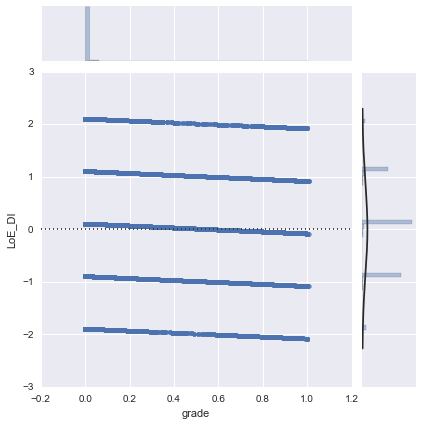

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.jointplot(d2.grade, d2.LoE_DI, kind='resid')
